In [1]:
%run quant_env.ipynb
%config Completer.use_jedi = False 
%load_ext Cython

from utils.auction_helpers import *
from utils.auctions import *
from utils.upstops import *
from utils.plate import *
from utils.data_source import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


Loading BokehJS ...

Work on data from 2018-01-01 to 2021-02-26
Constants:
stocks(4184):                name list_date
ts_code                      
688981.SH    中芯国际-U  20200716
689009.SH  九号公司-UWD  20201029
normal_stocks(3732):            name list_date
ts_code                  
605399.SH  晨光新材  20200804
605500.SH  森林包装  20201222


In [5]:
%%time

end_date = '2021-02-25'
df = pd.read_feather(f'../tmp/df{end_date}.feather').set_index(['ts_code','trade_date'])
ind_df = pd.read_feather(f'../tmp/ind_df.feather').set_index(['ts_code','trade_date'])
df = df.join(ind_df)
dfzb = df.loc[hszb_stock_list]
dfcyb = df.loc[cyb_stock_list]
# df1 = calc_yinyang(df)
# df1.tail(5)

CPU times: user 25.8 s, sys: 15.5 s, total: 41.3 s
Wall time: 41 s


In [3]:
COLS1=['fc_ratio','fl_ratio', 'avg_pct_chg', 'amt_ttl']

In [5]:
# from utils.data_sources import *
ak.stock_zh_a_tick_tx(code="sh600848", trade_date="20191011")

,成交时间,成交价格,价格变动,成交量(手),成交额(元),性质
0,09:25:04,26.17,0.18,163,426571,买盘
1,09:30:03,26.17,0.00,163,426636,卖盘
2,09:30:06,26.14,-0.03,38,99386,中性盘
3,09:30:11,26.15,0.01,110,287650,卖盘
4,09:30:15,26.14,-0.01,5,13078,卖盘
...,...,...,...,...,...,...
1978,14:56:43,26.19,-0.01,30,78584,卖盘
1979,14:56:46,26.19,0.00,1,2619,买盘
1980,14:56:52,26.21,0.02,26,68097,买盘
1981,14:56:54,26.18,-0.03,7,18326,卖盘


### Next Move
* 测试turnover_rate_f * net_pct_main，然后 cum 5 日
  * [x] net_trf_main
* net_mf_vol 5 日

In [6]:
tmp = df.loc['300293.SZ']
tmp.tail(3)

,vol,amount,turnover_rate,turnover_rate_f,open,close,high,low,pre_close,pct_chg,circ_mv,total_mv,net_mf_vol,net_pct_main,current,money,a1_p,a2_p,a3_p,a4_p,a5_p,a1_v,a2_v,a3_v,a4_v,a5_v,b1_p,b2_p,b3_p,b4_p,b5_p,b1_v,b2_v,b3_v,b4_v,b5_v,auc_vol,auc_allbuy_vol,auc_allsell_vol,auc_ratio_all,auc_ratio_b1s1,pre_auc_vol,auc_vol_ratio_1,ma_aucvol_5,auc_vol_ratio_5,ma_aucvol_20,auc_vol_ratio_20,amp,fc_ratio,fl_ratio,fd_amount,first_time,last_time,open_times,strth,limit,upstop_num,conseq_up_num,post_up_num,up_type,pre_up_type,ma_vol_5,ma_vol_10,ma_vol_20,vol_ratio,vol_ratio_long,vol_type,pre_close_4,pre_close_6,pre_close_11,pre_close_21,pre_pct_chg,pre3_pct_chg,pre5_pct_chg,pre10_pct_chg,pre20_pct_chg,next_close_1,next_close_2,next_close_3,next_close_10,next_close_20,next_pct_chg,next2_pct_chg,next3_pct_chg,next10_pct_chg,next20_pct_chg,max_pre60_close,max_pre120_close,name,list_date,is_hs,pre_conseq_up_num,pre_vol,pre_trf,net_trf_main,pre_vol_ratio,auc_vol_ratio,index,ind_code,ind_type,ind_name,avg_pct_chg,amt_ttl
trade_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-23,111208.05,128377.41,4.1188,7.4238,11.50,11.55,11.88,11.27,11.80,-2.1186,311850.0,311850.0,2626.0,-9.4082,11.50,1101700.0,11.53,11.54,11.55,11.56,11.65,100.0,2600.0,200.0,900.0,300.0,11.50,11.46,11.44,11.41,11.40,4600.0,9000.0,47400.0,2600.0,23900.0,958.0,87500.0,4100.0,21.341463,46.000000,359.0,2.668524,248.8,3.850482,484.15,1.978726,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,0,0,NaN,None,None,96046.428,83529.714,88416.8260,1.157857,1.257770,Tiny,10.16,9.98,11.18,13.89,2.7875,16.141732,18.236473,5.545617,-15.046796,13.86,14.8,NaN,NaN,NaN,20.000000,28.138528,NaN,NaN,NaN,21.23,30.9,蓝英装备,20120308,N,0.0,161612.94,10.7887,-0.698446,2.098955,0.478768,11719.0,850727,sw_l3,其它专用机械III,-1.053905,92.089768
2021-02-24,331549.34,442398.44,12.2796,22.1330,11.59,13.86,13.86,11.55,11.55,20.0000,374220.0,374220.0,-30079.0,15.7958,11.59,528504.0,11.65,11.68,11.75,11.78,11.80,100.0,300.0,300.0,3100.0,20100.0,11.59,11.55,11.40,11.39,11.38,3500.0,3700.0,300.0,1200.0,10000.0,456.0,18700.0,23900.0,0.782427,35.000000,958.0,0.475992,422.8,1.078524,523.30,0.871393,20.0,1.8534,0.2191,8199437.0,10:21:54,14:15:18,15.0,40.196297,U,1,1,NaN,W,None,107168.638,88481.019,86657.0715,3.093716,3.825993,Tiny,10.72,10.16,11.24,14.34,-2.1186,7.742537,13.681102,2.758007,-19.456067,14.80,NaN,NaN,NaN,NaN,6.782107,NaN,NaN,NaN,NaN,21.23,30.9,蓝英装备,20120308,N,0.0,111208.05,7.4238,3.496084,1.157857,0.204239,11719.0,850727,sw_l3,其它专用机械III,0.502518,105.114098
2021-02-25,496382.00,707979.10,18.3845,33.1366,13.55,14.80,16.56,13.00,13.86,6.7821,399600.0,399600.0,-52445.0,-4.2973,13.55,7826480.0,13.55,13.57,13.58,13.59,13.60,44000.0,7900.0,300.0,17900.0,47600.0,13.53,13.52,13.51,13.50,13.46,1200.0,400.0,700.0,5500.0,1000.0,5776.0,8800.0,117700.0,0.074766,0.027273,456.0,12.666667,440.6,13.109396,498.00,11.598394,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,0,0,NaN,None,W,162129.706,115818.253,97720.3065,3.061635,5.079620,Tiny,11.48,10.16,10.84,14.10,20.0000,20.731707,36.417323,27.859779,-1.702128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.20,30.9,蓝英装备,20120308,N,1.0,331549.34,22.1330,-1.423979,3.093716,1.710038,11719.0,850727,sw_l3,其它专用机械III,-0.681615,96.551517


In [18]:
tmp.loc[:,'avg_price'] = tmp.amount*10/tmp.vol

In [51]:
def strategy_mavp(df, mavg_span=10):
    # 上穿均线之日收盘时购买，若涨停则等到可以购买之日收盘时购买
    # 下穿均线当日收盘卖出
    name = '移动平均线策略'
    df = gen_ma(df, mavgs=[mavg_span], single_index=True)
    df = df.copy()
    df.loc[:,'hovertext'] = 'fwefw'

    hold = False
    # hold_sigs 表示当前已持有，用于计算涨幅
    hold_sigs = pd.Series(index=df.index, data=False)
    i = 0
    # 涨停不能买入
    for _ in df[['close','pre_close',f'ma_close_{mavg_span}', 'pct_chg']].itertuples():
        if hold:
            hold_sigs.iloc[i] = True
        else:
            hold_sigs.iloc[i] = False

        if (_[1]/_[3] > 1.03 and(hold or _[4] < 9.91)):
            hold = True
        elif (_[1]/_[3] < 0.97 and(not hold or _[4] > -9.91)):
            hold = False
        i += 1

    df.loc[:, 'hold'] = hold_sigs

    # plot k
    # TODO: plot buy & sell point
    df.loc[:,'hovertext'] = df.apply(f_get_hovertext, axis=1)
    plot_k_plotly(df, ma_spans=[mavg_span])
#     plot_k(df, mav=(mavg_span))

    # 累计涨幅
    # TODO：目前 hold = true 会计算第一日（收盘时购买）的涨幅，应该去掉，从第二日开始算
    sum_pct_chg = df[df.hold==True].pct_chg.sum()
    print(f'策略: {name}, 参数: {mavg_span}, 持仓天数: {len(df[df.hold==True])}，累积涨幅:{sum_pct_chg}')

    # TODO：同期指数涨幅： hs300, 上证综指，深证指数，板块涨幅
    return df

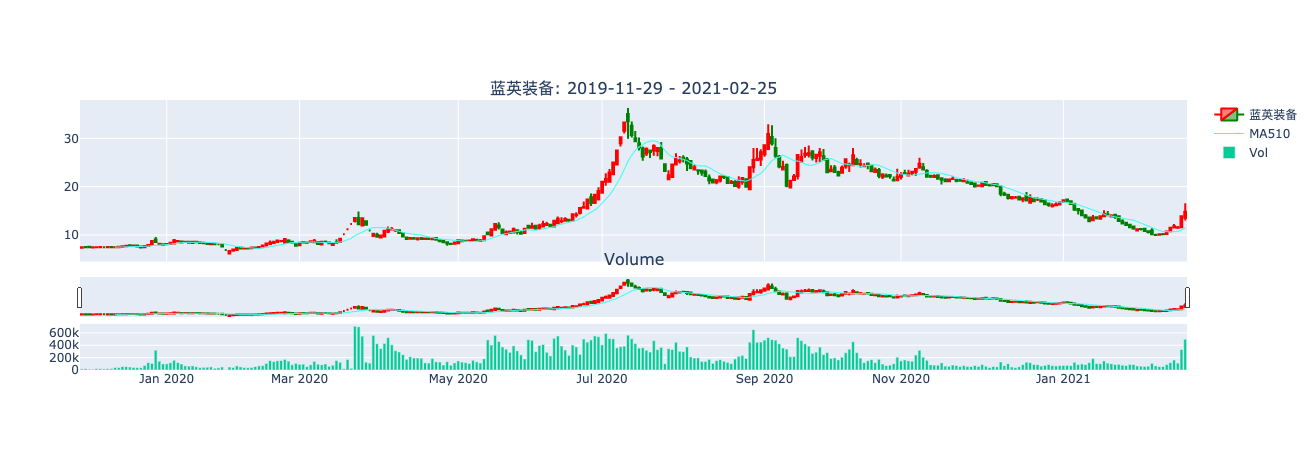

策略: 移动平均线策略, 参数: 10, 持仓天数: 104，累积涨幅:95.82530000000001


,vol,amount,turnover_rate,turnover_rate_f,open,close,high,low,pre_close,pct_chg,circ_mv,total_mv,net_mf_vol,net_pct_main,current,money,a1_p,a2_p,a3_p,a4_p,a5_p,a1_v,a2_v,a3_v,a4_v,a5_v,b1_p,b2_p,b3_p,b4_p,b5_p,b1_v,b2_v,b3_v,b4_v,b5_v,auc_vol,auc_allbuy_vol,auc_allsell_vol,auc_ratio_all,auc_ratio_b1s1,pre_auc_vol,auc_vol_ratio_1,ma_aucvol_5,auc_vol_ratio_5,ma_aucvol_20,auc_vol_ratio_20,amp,fc_ratio,fl_ratio,fd_amount,first_time,last_time,open_times,strth,limit,upstop_num,conseq_up_num,post_up_num,up_type,pre_up_type,ma_vol_5,ma_vol_10,ma_vol_20,vol_ratio,vol_ratio_long,vol_type,pre_close_4,pre_close_6,pre_close_11,pre_close_21,pre_pct_chg,pre3_pct_chg,pre5_pct_chg,pre10_pct_chg,pre20_pct_chg,next_close_1,next_close_2,next_close_3,next_close_10,next_close_20,next_pct_chg,next2_pct_chg,next3_pct_chg,next10_pct_chg,next20_pct_chg,max_pre60_close,max_pre120_close,name,list_date,is_hs,pre_conseq_up_num,pre_vol,pre_trf,net_trf_main,pre_vol_ratio,auc_vol_ratio,index,ind_code,ind_type,ind_name,avg_pct_chg,amt_ttl,avg_price,ma_close_10,hl_pct,hovertext,hold
trade_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-29,19316.02,14292.156,0.7154,2.0021,7.35,7.48,7.48,7.31,7.35,1.7687,201960.0,201960.0,1753.0,3.8423,7.35,72030.0,7.42,7.43,7.44,7.45,7.46,2900.0,1400.0,5700.0,2200.0,300.0,7.35,7.31,7.30,7.29,7.26,21100.0,8100.0,100.0,100.0,12000.0,98.0,41400.0,12500.0,3.312000,7.275862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,0,0,0.0,None,None,NaN,NaN,NaN,NaN,NaN,Tiny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.45,7.47,7.47,7.56,8.53,-0.401070,-0.133690,-0.133690,1.069519,14.037433,NaN,NaN,蓝英装备,20120308,N,NaN,NaN,NaN,0.076927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.399121,NaN,2.272727,\n2019-11-29<br>\nPCT: 1.7687%<br>\nHigh: 7.48...,False
2019-12-02,19187.00,14389.029,0.7106,1.9888,7.53,7.45,7.64,7.42,7.48,-0.4011,201150.0,201150.0,-4999.0,2.7619,7.53,131775.0,7.53,7.58,7.63,7.65,7.67,4900.0,2000.0,1000.0,2300.0,800.0,7.48,7.42,7.41,7.40,7.39,83600.0,22700.0,2300.0,2400.0,600.0,175.0,111600.0,11000.0,10.145455,17.061224,98.0,1.785714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,0,0,0.0,None,None,NaN,NaN,NaN,NaN,NaN,Tiny,NaN,NaN,NaN,NaN,1.7687,NaN,NaN,NaN,NaN,7.47,7.47,7.49,7.68,8.19,0.268456,0.268456,0.536913,3.087248,9.932886,NaN,NaN,蓝英装备,20120308,N,0.0,19316.02,2.0021,0.054929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.499364,NaN,2.953020,\n2019-12-02<br>\nPCT: -0.4011%<br>\nHigh: 7.6...,False
2019-12-03,15019.00,11152.658,0.5563,1.5568,7.55,7.47,7.55,7.36,7.45,0.2685,201690.0,201690.0,-3673.0,-8.1028,7.55,447715.0,7.55,7.56,7.57,7.58,7.59,29900.0,13100.0,7000.0,50000.0,8500.0,7.42,7.37,7.35,7.32,7.31,5000.0,500.0,5000.0,1100.0,11800.0,593.0,23400.0,108500.0,0.215668,0.167224,175.0,3.388571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,0,0,0.0,None,None,NaN,NaN,NaN,NaN,NaN,Tiny,NaN,NaN,NaN,NaN,-0.4011,NaN,NaN,NaN,NaN,7.47,7.49,7.51,7.77,8.00,0.000000,0.267738,0.535475,4.016064,7.095047,NaN,NaN,蓝英装备,20120308,N,0.0,19187.00,1.9888,-0.126144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.425699,NaN,2.543507,\n2019-12-03<br>\nPCT: 0.2685%<br>\nHigh: 7.55...,False
2019-12-04,13888.00,10317.482,0.5144,1.4395,7.42,7.47,7.47,7.36,7.47,0.0000,201690.0,201690.0,530.0,0.1801,7.42,115752.0,7.47,7.50,7.53,7.54,7.55,14000.0,700.0,7000.0,8400.0,4900.0,7.42,7.41,7.40,7.36,7.34,5500.0,6600.0,8800.0,500.0,3000.0,156.0,24400.0,35000.0,0.697143,0.392857,593.0,0.263069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,0,0,0.0,None,None,NaN,NaN,NaN,NaN,NaN,Tiny,NaN,NaN,NaN,NaN,0.2685,NaN,NaN,NaN,NaN,7.49,7.51,7.48,7.79,8.16,0.267738,0.535475,0.133869,4.283802,9.236948,NaN,NaN,蓝英装备,20120308,N,0.0,15019.00,1.5568,0.002593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.429063,NaN,1.472557,\n2019-12-04<br>\nPCT: 0.0%<br>\nHigh: 7.47<br...,False
2019-12-05,23567.76,17636.299,0.8729,2.4428,7.48,7.49,7.52,7.43,7.47,0.2677,202230.0,202230.0,1634.0,-5.6098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [56]:
strategy_mavp(tmp)

In [57]:
# 计算加权平均的价格均线和每日成交均价
def gen_avg_price_ma(df, ma_spans=[5, 10, 20]):
    for span in ma_spans:
        df.loc[:, f'amount_sum_{span}'] = df.groupby(level='ts_code').amount.rolling(window=span).sum()
        df.loc[:, f'vol_sum_{span}'] = df.groupby(level='ts_code').vol.rolling(window=span).sum()
        df.loc[:, f'ma_price_{span}'] = df[f'amount_sum_{span}']*10/df[f'ma_price_{span}']
        df.drop(columns=[f'amount_sum_{span}', f'ma_price_{span}'])
    return df

In [58]:
df = gen_avg_price_ma(df)
df[['ma_price_10', 'ma_price_5', 'ma_price_20']]

ValueError: operands could not be broadcast together with shapes (1066574,2) (3,) (1066574,2) 

In [ ]:
df.loc[:,'ma_price_10'] = df.groupby(level='ts_code').amount.rolling(window=10).sum()*10/df.groupby(level='ts_code').vol.rolling(window=5).sum()

In [21]:
plot_mline(tmp, legend_labels=['avg_price', 'close'], title=';fw', y_label='price')

In [ ]:
tmp.vol

In [ ]:
tmp.

In [ ]:
'000807', '000932', '600873',
'600502' #laoyatou
'300296' # qixing


In [111]:
show_span(df, '300293', end_date, post_span=20, pre_span=16, add_cols=COLS1)

名称：蓝英装备, 板块：其它专用机械III, 流值：62.69亿, 市值：62.69亿


,up_type,pct_chg,auc_ratio_all,auc_vol_ratio,auc_vol,turnover_rate_f,net_pct_main,net_trf_main,net_mf_vol,vol_ratio,vol,fc_ratio,fl_ratio,avg_pct_chg,amt_ttl
trade_date,,,,,,,,,,,,,,,
2020-06-03 00:00:00,None,2.7%,0.534,0.675,4539,35.8%,-0.88%,-0.315%,6971,1.49,480218,nan,nan,0.29%,96.0599
2020-06-04 00:00:00,None,-4.41%,10.3,0.887,6303,22.0%,-9.51%,-2.09%,-49815,0.866,295122,nan,nan,1.06%,88.6861
2020-06-05 00:00:00,None,6.29%,19.1,0.216,1520,29.6%,4.1%,1.21%,58049,1.17,396435,nan,nan,0.513%,91.7384
2020-06-08 00:00:00,None,2.59%,1.86,0.562,4312,30.8%,-1.7%,-0.524%,-29938,1.12,412377,nan,nan,-0.504%,86.0263
2020-06-09 00:00:00,None,0.0%,6.7,0.375,3241,21.4%,-8.89%,-1.9%,-43979,0.691,286767,nan,nan,0.604%,71.8933
2020-06-10 00:00:00,None,-4.39%,1.16,0.124,964,16.9%,-8.42%,-1.42%,-41003,0.605,226209,nan,nan,0.209%,76.4015
2020-06-11 00:00:00,L,10.0%,0.171,0.116,781,38.2%,23.6%,9.01%,-49196,1.58,511486,1.3204,0.2454,0.102%,94.4376
2020-06-12 00:00:00,None,3.48%,0.337,0.832,6356,41.0%,-10.8%,-4.41%,568,1.5,549265,nan,nan,-0.119%,88.0497
2020-06-15 00:00:00,None,-3.44%,13.8,0.584,4831,28.8%,-6.57%,-1.89%,-37234,0.973,386439,nan,nan,-0.126%,89.8244


In [49]:
# 前期表现
# net_pct_main 前几日转正
# auc_ratio_all 相对值略增，绝对值很低
# pct_chg 当日不高，有长上影
show_span(dfzb, '000951', '2021-02-01', post_span=10, add_cols=COLS1)

名称：中国重汽, 板块：商用载货车III, 流值：285.47亿, 市值：285.54亿


,up_type,pct_chg,auc_ratio_all,auc_vol_ratio,auc_vol,turnover_rate_f,net_pct_main,net_trf_main,net_mf_vol,vol_ratio,vol,fc_ratio,fl_ratio,avg_pct_chg,amt_ttl
trade_date,,,,,,,,,,,,,,,
2021-01-19 00:00:00,None,-2.34%,0.34,0.0981,376,5.43%,-2.6%,-0.141%,-7831,0.702,129165,nan,nan,0.263%,17.5435
2021-01-20 00:00:00,None,7.37%,0.34,0.122,495,6.84%,16.1%,1.1%,23112,0.833,162701,nan,nan,4.12%,21.2796
2021-01-21 00:00:00,None,0.144%,19.9,0.193,723.22,5.54%,9.16%,0.508%,-21725,0.734,131759,nan,nan,0.0453%,19.2176
2021-01-22 00:00:00,None,-4.69%,0.193,0.131,417,6.2%,-7.97%,-0.494%,-5082,0.964,147382,nan,nan,-1.72%,23.7187
2021-01-25 00:00:00,None,6.01%,0.0964,0.127,364,6.52%,11.5%,0.752%,14291,1.13,155053,nan,nan,-1.67%,19.964
2021-01-26 00:00:00,None,-4.69%,0.0391,0.647,1958,6.68%,5.3%,0.354%,-40288,1.09,158749,nan,nan,-3.22%,15.4777
2021-01-27 00:00:00,None,0.323%,22.5,0.188,593,5.75%,1.84%,0.106%,3917,0.905,136793,nan,nan,1.05%,15.147
2021-01-28 00:00:00,None,-1.46%,0.484,0.345,1050.21,5.7%,-3.99%,-0.227%,9391,0.928,135506,nan,nan,-2.67%,14.6746
2021-01-29 00:00:00,None,0.176%,4.04,0.0782,239,6.09%,-6.12%,-0.373%,18417,0.987,144859,nan,nan,-2.69%,15.747


In [26]:
tmp = dfzb[(dfzb.limit == 'U') & (dfzb.turnover_rate_f > 20) & (dfzb.net_pct_main < -8) & (dfzb.vol_ratio > 10)]
tmp.next_pct_chg.mean()

2.0148535378177383

In [354]:
# net_pct_main 前几日大幅提高，涨停前 2 天转负，疑似洗盘
# auc_ratio_all t-1日出现很大比例正值，量比在涨停前 2 日显著增加
# pct_chg 当日不高，有长上影
# after:
# 开板当日巨幅高开，竞价成交量很大，但 auc_ratio_all 为 0.3 意味着有很多高价位的卖盘没成交，开盘后急速下滑
show_span(dfzb, '600691.SH', '2021-01-19')

名称：阳煤化工, 流值：48.3亿, 市值：65.34亿


,up_type,pct_chg,auc_ratio_all,auc_vol_ratio,auc_vol,turnover_rate_f,net_pct_main,net_mf_vol,vol_ratio,vol
trade_date,,,,,,,,,,
2021-01-06 00:00:00,None,0.444%,0.859581,0.110609,429,1.13%,0.102%,-30629,0.714774,133069
2021-01-07 00:00:00,None,-3.1%,2.77489,0.077889,289,1.72%,-7.47%,-93876,1.14062,203145
2021-01-08 00:00:00,None,-0.913%,1.36386,0.0993251,384,1.42%,3.15%,-38161,0.901263,167250
2021-01-11 00:00:00,None,3.69%,1.2501,0.276183,1020,1.8%,16.0%,12371,1.1968,212162
2021-01-12 00:00:00,None,5.33%,1.1976,0.186028,717,2.38%,17.8%,45631,1.52168,281517
2021-01-13 00:00:00,None,-1.27%,0.25843,0.241169,1002,1.38%,5.76%,-22354,0.819488,163429
2021-01-14 00:00:00,None,2.56%,0.704668,2.4575,10521.2,3.45%,-1.49%,-5588,1.98163,407226
2021-01-15 00:00:00,None,-5.42%,8.48412,1.55838,7997,2.14%,-11.7%,-76901,1.02571,252649
2021-01-18 00:00:00,L,10.1%,0.733961,0.283557,1556,3.72%,19.1%,10423,1.66779,439291


In [355]:
# 次日高开涨停，再次日高开下砸，pass
# net_mf_vol 和 net_pct_main 均没有特别表现
show_span(dfzb, '603863.SH', '2021-01-19')

名称：松炀资源, 流值：13.36亿, 市值：25.32亿


,up_type,pct_chg,auc_ratio_all,auc_vol_ratio,auc_vol,turnover_rate_f,net_pct_main,net_mf_vol,vol_ratio,vol
trade_date,,,,,,,,,,
2021-01-06 00:00:00,None,3.49%,0.510791,0.0235964,8,4.84%,4.27%,1408,3.23394,52628
2021-01-07 00:00:00,None,-3.09%,0.565371,0.757303,353,3.28%,-5.76%,-9621,1.59483,35683
2021-01-08 00:00:00,None,-0.597%,7.18519,0.142367,80,2.51%,-7.91%,-4148,1.01073,27262
2021-01-11 00:00:00,None,-2.9%,0.265432,0.151595,92,2.17%,1.47%,-6617,0.809513,23581.4
2021-01-12 00:00:00,None,4.23%,0.158065,0.0685425,44,3.02%,0.815%,3468,1.06618,32852.3
2021-01-13 00:00:00,None,-3.17%,0.637255,0.468819,336,2.7%,-6.55%,-6488,0.852816,29338
2021-01-14 00:00:00,None,2.55%,0.586957,0.0451866,28,2.68%,5.03%,3006,0.977505,29074.3
2021-01-15 00:00:00,None,1.2%,0.110448,0.668788,396,3.71%,-0.96%,1419,1.4201,40361.4
2021-01-18 00:00:00,L,10.0%,1.8156,0.47472,307,4.6%,42.0%,-10993,1.61039,49989


In [50]:
# 之前出现了跌幅不大但是 net_pct_main 巨大的情况，且 vol 也同时放大，不太明白
show_span(dfzb, '000558.SZ', '2021-01-20', pre_span=20, add_cols=COLS1)

名称：莱茵体育, 板块：房地产开发III, 流值：36.2亿, 市值：36.23亿


,up_type,pct_chg,auc_ratio_all,auc_vol_ratio,auc_vol,turnover_rate_f,net_pct_main,net_trf_main,net_mf_vol,vol_ratio,vol,fc_ratio,fl_ratio,avg_pct_chg,amt_ttl
trade_date,,,,,,,,,,,,,,,
2020-12-23 00:00:00,None,0.717%,0.113,0.106,406,1.39%,2.84%,0.0396%,-4450,0.476,87107,nan,nan,-0.187%,118.519
2020-12-24 00:00:00,None,3.56%,0.254,0.199,616,3.85%,5.25%,0.202%,28481,1.62,240770,nan,nan,-1.63%,99.2495
2020-12-25 00:00:00,None,-0.687%,3.81,0.553,1790,1.83%,-2.54%,-0.0464%,-16437,0.736,114355,nan,nan,0.448%,80.256
2020-12-28 00:00:00,None,-3.46%,4.07,0.105,314,2.42%,-12.9%,-0.312%,-54799,1.05,151174,nan,nan,-1.14%,96.1737
2020-12-29 00:00:00,None,-0.358%,0.847,0.151,458,1.65%,0.971%,0.016%,-20368,0.708,103009,nan,nan,0.765%,91.359
2020-12-30 00:00:00,None,-0.36%,1.22,0.0538,156,0.949%,-1.98%,-0.0187%,-10996,0.426,59349,nan,nan,0.308%,93.4991
2020-12-31 00:00:00,None,0.361%,2.37,0.189,527,1.18%,0.871%,0.0102%,5079,0.55,73554.3,nan,nan,0.863%,115.59
2021-01-04 00:00:00,None,0.0%,1.63,0.297,621.5,1.53%,-9.55%,-0.146%,-6782,0.955,95811,nan,nan,-1.19%,178.763
2021-01-05 00:00:00,None,-2.88%,3.51,0.172,347,2.32%,-17.5%,-0.406%,-71692,1.5,144978,nan,nan,-0.529%,156.558


In [360]:
# 000613
show_span(dfzb, '000613.SZ', '2021-01-20')

名称：大东海A, 流值：11.93亿, 市值：16.28亿


,up_type,pct_chg,auc_ratio_all,auc_vol_ratio,auc_vol,turnover_rate_f,net_pct_main,net_mf_vol,vol_ratio,vol
trade_date,,,,,,,,,,
2021-01-07 00:00:00,None,-5.19%,0.989726,0.202214,312,4.63%,-6.47%,-16232,1.21741,90162
2021-01-08 00:00:00,None,-1.99%,0.461538,0.19505,333,3.63%,-7.32%,294,0.862986,70720
2021-01-11 00:00:00,None,-5.84%,0.744186,0.362959,619,5.9%,-4.01%,-18495,1.40383,114918
2021-01-12 00:00:00,None,-0.809%,3.15612,0.0945008,167,3.96%,0.775%,1158,0.90825,77042
2021-01-13 00:00:00,None,-5.43%,1.10514,0.137821,241,3.99%,-3.37%,-8924,0.925434,77676
2021-01-14 00:00:00,None,-0.575%,0.0849539,0.361239,648,3.43%,-1.63%,13498,0.776983,66901
2021-01-15 00:00:00,None,2.89%,0.974592,0.166185,282,2.87%,2.69%,5036,0.687014,55958.2
2021-01-18 00:00:00,None,3.65%,0.682451,0.251315,411,3.76%,4.79%,8084,0.933931,73312.7
2021-01-19 00:00:00,W,10.0%,0.119263,0.220924,323,6.47%,17.5%,6476,1.79626,126058


In [364]:
# 上升趋势，
show_span(dfzb, '002906.SZ', '2021-01-20', pre_span=15)

名称：华阳集团, 流值：152.41亿, 市值：153.38亿


/Users/tzhu/.virtualenv/stock/lib/python3.7/site-packages/pandas/io/formats/style.py:1031: RuntimeWarning: invalid value encountered in double_scalars
  norm = colors.Normalize(smin - (rng * low), smax + (rng * high))


,up_type,pct_chg,auc_ratio_all,auc_vol_ratio,auc_vol,turnover_rate_f,net_pct_main,net_mf_vol,vol_ratio,vol
trade_date,,,,,,,,,,
2020-12-30 00:00:00,None,2.83%,2.2619,0.128256,101,4.4%,10.1%,4192,1.10507,41770.9
2020-12-31 00:00:00,None,1.7%,0.333333,0.238923,182,4.57%,5.58%,318,1.18696,43400.1
2021-01-04 00:00:00,None,5.71%,7.29412,0.297715,233,5.91%,4.37%,10378,1.49174,56038.8
2021-01-05 00:00:00,None,-10.0%,0.0786885,0.233554,202,9.17%,-2.51%,633,2.09671,87045
2021-01-06 00:00:00,None,-8.42%,0.180602,0.205572,221,9.4%,-9.84%,-11022,1.72875,89207.6
2021-01-07 00:00:00,None,1.06%,0.403509,0.369682,489,6.32%,3.32%,-7250,0.944934,59996.2
2021-01-08 00:00:00,None,0.253%,0.336634,0.123686,173,3.77%,-2.72%,379,0.532831,35772.9
2021-01-11 00:00:00,O,10.0%,2.01282,0.117783,161,5.4%,23.4%,8790,0.780729,51225.3
2021-01-12 00:00:00,None,-2.37%,0.20915,0.623672,840,8.06%,-8.43%,21101,1.18251,76448.4


In [378]:
show_span(dfzb, '000020.SZ', '2021-01-20', pre_span=15)

名称：深华发A, 流值：21.63亿, 市值：33.81亿


,up_type,pct_chg,auc_ratio_all,auc_vol_ratio,auc_vol,turnover_rate_f,net_pct_main,net_mf_vol,vol_ratio,vol
trade_date,,,,,,,,,,
2020-12-30 00:00:00,None,1.09%,0.145363,0.91189,357,2.44%,-9.61%,1045,0.803172,15093
2020-12-31 00:00:00,None,-2.44%,0.125257,0.36232,153,3.91%,-14.8%,1972,1.19216,24164.4
2021-01-04 00:00:00,None,3.9%,0.0814978,0.798124,388,4.66%,26.1%,6902,1.23601,28842
2021-01-05 00:00:00,None,-4.82%,0.117012,0.67354,348,7.51%,-30.8%,9468,1.87356,46465
2021-01-06 00:00:00,None,-5.47%,0.294964,0.120614,71,3.19%,-10.7%,-6470,0.699331,19759.8
2021-01-07 00:00:00,None,-3.1%,nan,0,0,3.14%,-36.2%,-2349,0.722969,19422.4
2021-01-08 00:00:00,None,-0.221%,1.01752,0.173093,100,1.52%,-10.2%,-3131,0.339355,9410.57
2021-01-11 00:00:00,None,-1.99%,nan,0,0,1.49%,-5.36%,-3479,0.372478,9230
2021-01-12 00:00:00,None,1.47%,1.4331,0.0253146,11,0.737%,2.88%,-1073,0.218654,4560.59


In [367]:
show_span(dfzb, '603058.SH', '2021-01-20', pre_span=15)

名称：永吉股份, 流值：34.09亿, 市值：34.15亿


,up_type,pct_chg,auc_ratio_all,auc_vol_ratio,auc_vol,turnover_rate_f,net_pct_main,net_mf_vol,vol_ratio,vol
trade_date,,,,,,,,,,
2020-12-30 00:00:00,None,-0.286%,1.40361,0.0272421,11,0.731%,-2.65%,-1671,0.576892,11181.2
2020-12-31 00:00:00,None,0.86%,1.75342,0.0953057,38,0.789%,0.101%,-1295,0.631134,12078.9
2021-01-04 00:00:00,None,1.14%,1.5045,0.00287441,1,1.03%,-8.04%,-284,0.9458,15794
2021-01-05 00:00:00,None,-1.54%,0.633803,0.461461,141,1.32%,-5.28%,-5872,1.37307,20138
2021-01-06 00:00:00,None,0.0%,3.70408,0.208373,63,1.32%,-5.65%,-4145,1.39098,20186.5
2021-01-07 00:00:00,None,-2.43%,0.245509,0.438405,145,1.8%,3.43%,-4811,1.73329,27517.2
2021-01-08 00:00:00,None,-0.439%,1.58667,0.215641,86,1.48%,3.14%,-7830,1.17924,22574.2
2021-01-11 00:00:00,None,-2.5%,8.10588,0.338951,150,1.16%,0.647%,-6668,0.836645,17772
2021-01-12 00:00:00,None,0.0%,1.15556,0.170814,77,1.05%,-9.42%,-1938,0.739432,15999.5


In [369]:
df1.sort_index(level='trade_date').tail(200).head(10)

,,vol,amount,turnover_rate,turnover_rate_f,open,close,high,low,pre_close,pct_chg,circ_mv,total_mv,net_mf_vol,net_pct_main,current,money,a1_p,a2_p,a3_p,a4_p,a5_p,a1_v,a2_v,a3_v,a4_v,a5_v,b1_p,b2_p,b3_p,b4_p,b5_p,b1_v,b2_v,b3_v,b4_v,b5_v,auc_vol,auc_allbuy_vol,auc_allsell_vol,auc_ratio_all,auc_ratio_b1s1,pre_auc_vol,auc_vol_ratio_1,amp,fc_ratio,fl_ratio,fd_amount,first_time,last_time,open_times,strth,limit,upstop_num,conseq_up_num,post_up_num,up_type,pre_up_type,ma_vol_5,ma_vol_10,ma_vol_20,vol_ratio,vol_ratio_long,vol_type,pre_close_4,pre_close_6,pre_close_11,pre_close_21,pre_pct_chg,pre3_pct_chg,pre5_pct_chg,pre10_pct_chg,pre20_pct_chg,next_close_1,next_close_2,next_close_3,next_close_10,next_close_20,next_pct_chg,next2_pct_chg,next3_pct_chg,next10_pct_chg,next20_pct_chg,max_pre60_close,max_pre120_close,name,list_date,is_hs,pre_conseq_up_num,pre_vol,pre_trf,pre_vol_ratio,auc_vol_ratio
ts_code,trade_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
600230.SH,2021-02-03,187183.88,192079.80,4.5448,8.4547,10.43,10.04,10.58,10.04,10.60,-5.2830,413510.97,413510.97,-34178.0,-7.3298,10.43,3604608.0,10.45,10.46,10.47,10.48,10.49,10000.0,33600.0,1000.0,1300.0,1500.0,10.43,10.42,10.40,10.38,10.37,31900.0,4900.0,5300.0,15300.0,9800.0,3456.0,67200.0,47400.0,1.417722,3.190000,2500.00,1.382400,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,0,0,0.0,None,W,149489.600,92633.507,6.493065e+04,1.252153,2.882828,Tiny,8.53,8.25,8.24,9.28,9.9585,24.267292,28.484848,28.640777,14.224138,9.99,9.88,10.75,NaN,NaN,-0.498008,-1.593625,7.071713,NaN,NaN,10.95,12.83,沧州大化,20000406,N,1.0,205060.78,9.2622,1.774305,1.109696
600239.SH,2021-02-03,375438.60,83701.66,2.3382,4.0243,2.35,2.15,2.37,2.12,2.28,-5.7018,345222.70,345222.70,-54206.0,0.6930,2.35,1346550.0,2.36,2.37,2.38,2.39,2.40,3514.0,17100.0,26700.0,4500.0,41200.0,2.35,2.34,2.33,2.32,2.31,66700.0,19700.0,17500.0,11600.0,71400.0,5730.0,186900.0,93014.0,2.009375,18.981218,1300.00,4.407692,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,0,0,0.0,None,L,248808.192,418765.272,3.673948e+05,1.508948,1.021894,Tiny,2.29,2.31,2.86,2.41,10.1449,-0.436681,-1.298701,-20.279720,-5.394191,2.16,2.13,2.09,NaN,NaN,0.465116,-0.930233,-2.790698,NaN,NaN,3.05,4.27,云南城投,19991202,N,1.0,237087.34,2.5413,0.920514,1.105430
600292.SH,2021-02-03,565122.90,380858.10,7.2376,15.1792,6.71,6.53,7.02,6.43,6.63,-1.5083,509873.44,509873.44,-13240.0,-4.4904,6.71,8677372.0,6.71,6.72,6.73,6.74,6.75,105600.0,19200.0,12000.0,36600.0,47600.0,6.70,6.68,6.67,6.66,6.65,504500.0,3000.0,2500.0,8400.0,9200.0,12932.0,527600.0,221000.0,2.387330,4.777462,1147.00,11.274629,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,0,0,0.0,None,W,283633.342,274398.132,3.806029e+05,1.992442,1.484810,Tiny,6.49,5.88,6.28,6.96,9.9502,2.157165,12.755102,5.573248,-4.741379,6.75,6.35,6.16,NaN,NaN,3.369066,-2.756508,-5.666156,NaN,NaN,8.50,8.50,远达环保,20001101,N,1.0,236052.58,6.3404,0.831010,2.188516
600392.SH,2021-02-03,1247069.60,2270500.20,7.1051,10.4971,16.92,19.04,19.04,16.86,17.31,9.9942,3341838.00,3341838.00,-148716.0,8.2113,16.92,89914576.0,16.92,16.93,16.94,16.95,16.96,70450.0,29800.0,22100.0,81200.0,17900.0,16.91,16.90,16.89,16.88,16.87,105800.0,21400.0,89700.0,8400.0,300.0,53141.0,225600.0,221450.0,1.018740,1.501774,28293.00,1.878238,12.59,9.1833,0.6239,208506720.0,09:49:32,09:50:11,1.0,53.359524,U,1,2,-1.0,L,W,2003618.720,2010115.740,1.668575e+06,0.622409,0.747386,Tiny,14.88,15.73,11.27,9.28,9.9746,16.330645,10.044501,53.593611,86.530172,18.88,16.99,17.17,NaN,NaN,-0.840336,-10.766807,-9.821429,NaN,NaN,17.31,17.31,盛和资源,20030529,H,1.0,2279094.50,19.1841,1.131409,1.273081
600803.SH,2021-02-03,305094.34,543678.25,2.4817,6.2005,18.00,17.85,18.21,17.36,17.78,0.3937,2194400.00,5079848.50,-13617.0,5.4231,18.00,6354000.0,18.00,18.01,18.03,18.05,18.06,63566.0,12500.0,3900.0,22600.0,26000.0,17.96,17.95,17.90,17.87,17.86,100.0,700.0,500.0,100.0,700.0,3530.0,2100.0,128566.0,0.016334,0.001573,881.00,4.006810,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,0,0,0.0,None,O,14

In [374]:
show_span(dfzb, '600292.SH', t_date='2021-02-03')

名称：远达环保, 流值：50.99亿, 市值：50.99亿


,up_type,pct_chg,auc_ratio_all,auc_vol_ratio,auc_vol,turnover_rate_f,net_pct_main,net_mf_vol,vol_ratio,vol
trade_date,,,,,,,,,,
2021-01-21 00:00:00,None,0.647%,6.45205,0.379153,2551,6.77%,-9.54%,-16516,0.780557,252082
2021-01-22 00:00:00,None,-2.41%,1.81769,0.948769,5928,8.12%,0.454%,-9421,1.0086,302487
2021-01-25 00:00:00,None,2.64%,1.51745,1.23956,7490,7.54%,1.28%,16613,0.96845,280888
2021-01-26 00:00:00,None,-5.62%,0.432314,0.74366,4293,6.4%,-14.2%,-69347,0.859497,238162
2021-01-27 00:00:00,None,0.34%,1.96108,0.14898,823,3.9%,-7.78%,-5069,0.547005,145045
2021-01-28 00:00:00,L,10.0%,0.729443,0.285361,1449,8.29%,26.3%,45295,1.26681,308763
2021-01-29 00:00:00,None,-3.7%,0.845535,2.11218,11224,12.6%,-9.85%,-52725,1.8337,467721
2021-02-01 00:00:00,None,-3.52%,1.96607,1.30231,7817,7.0%,-10.1%,-62432,0.904445,260585
2021-02-02 00:00:00,W,9.95%,0.299472,0.193822,1147,6.34%,32.4%,2593,0.83101,236053


In [40]:
tmp[BASIC_COLS+ORI_COLS+ADDED_COLS].filter(like='2021-01',axis=0)

,,name,open,high,low,close,pct_chg,amount,amp,first_time,last_time,open_times,fc_ratio,fl_ratio,limit,upstop_num,conseq_up_num,post_up_num,up_type
ts_code,trade_date,,,,,,,,,,,,,,,,,,
000014.SZ,2021-01-20,沙河股份,8.64,8.64,8.23,8.43,-3.2147,85865.040,NaN,None,None,NaN,NaN,NaN,None,0,0,0.0,None
000020.SZ,2021-01-19,深华发A,10.20,10.85,10.15,10.85,10.0406,65018.996,7.10,None,None,0.0,194.6184,6.4374,U,1,2,1.0,O
000026.SZ,2021-01-28,飞亚达,13.44,13.44,12.55,12.80,-2.1407,200355.160,NaN,None,None,NaN,NaN,NaN,None,0,0,0.0,None
000029.SZ,2021-01-15,深深房A,7.54,8.18,7.38,7.84,4.3941,324198.000,NaN,None,None,NaN,NaN,NaN,None,0,0,0.0,None
000030.SZ,2021-01-21,富奥股份,6.98,6.98,6.70,6.78,-4.2373,172039.300,NaN,None,None,NaN,NaN,NaN,None,0,0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603995.SH,2021-01-05,甬金股份,29.45,31.48,29.07,31.48,9.9930,173751.310,8.42,11:04:12,11:20:54,7.0,5.4172,0.2894,U,1,2,0.0,O
605118.SH,2021-01-12,力鼎光电,16.00,16.26,15.43,15.57,-3.1716,60527.496,NaN,None,None,NaN,NaN,NaN,None,0,0,0.0,None
605168.SH,2021-01-12,三人行,196.02,202.21,191.66,194.00,-1.0204,220906.450,NaN,None,None,NaN,NaN,NaN,None,0,0,0.0,None
